## Using GasTurb 14 to generate data for off-design steady state performance model 


#### Input Parameters:
- Altitude (alt)
- Mach Number (XM)
- HPC Spool Speed (ZXN_HPC) 

#### Output Parameters to be defined at a later stage.

### GasTurb File Format

[Single Data] <br>
alt = 0<br>
XM = 0<br>
ZXN_HPC = 0.9<br>
[Calculate] 1<br>
[Single Data]<br>
alt = 0<br>
XM = 0<br>
ZXN_HPC = 0.9<br>
[Calculate] 2<br>
[Single Data]<br>
alt = 1000<br>
XM = 0<br>
ZXN_HPC = 0.9<br>
[Calculate] 3<br>
[Single Data]<br>
alt = 0<br>
XM = 0.8<br>
ZXN_HPC = 0.9<br>
[Calculate] 4

## Steps:

- Set a range for alt, XM and ZXN_HPC
- Fill the design space
- Generate .txt file in the above format

## Ranges:
#### alt (m) 
0-6000 
#### XM
0-0.7 
#### ZXN_HPC 
0.6-1 

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
from scipy.stats import qmc

sampler = qmc.Sobol(d=3, scramble=False, seed=42)

sample = sampler.random_base2(m=13)

sample

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 5.00000000e-01, 5.00000000e-01],
       [7.50000000e-01, 2.50000000e-01, 2.50000000e-01],
       ...,
       [7.50122070e-01, 7.83325195e-01, 7.51586914e-01],
       [5.00122070e-01, 3.33251953e-02, 1.58691406e-03],
       [1.22070312e-04, 5.33325195e-01, 5.01586914e-01]])

In [85]:
qmc.discrepancy(sample)

6.421717668736449e-08

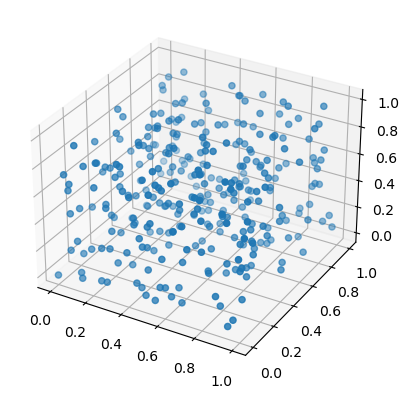

In [118]:
ax = plt.axes(projection='3d')
aa = np.arange(0,8142,25)
ax.scatter3D(sample[aa,0], sample[aa,1], sample[aa,2])

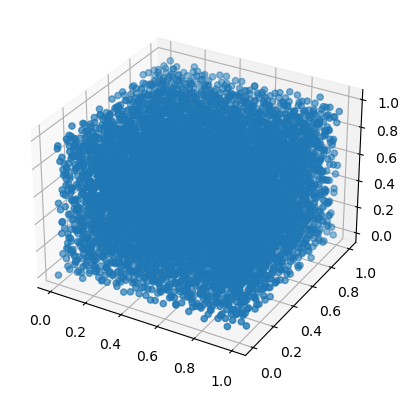

In [86]:
ax = plt.axes(projection='3d')
ax.scatter3D(sample[:,0], sample[:,1], sample[:,2])

In [100]:
l_bounds = [0, 0, 0.6]
u_bounds = [6000, 0.7, 1]

In [101]:
data = qmc.scale(sample, l_bounds, u_bounds)

In [102]:
df = pd.DataFrame(data)

In [103]:
df.columns = ["alt", "XM", "ZXN_HPC"]

In [104]:
df

,alt,XM,ZXN_HPC
0,0.000000,0.000000,0.600000
1,3000.000000,0.350000,0.800000
2,4500.000000,0.175000,0.700000
3,1500.000000,0.525000,0.900000
4,2250.000000,0.262500,0.850000
...,...,...,...
8187,2250.732422,0.635828,0.650635
8188,1500.732422,0.198328,0.700635
8189,4500.732422,0.548328,0.900635
8190,3000.732422,0.023328,0.600635


In [105]:
df.shape[0]

8192

In [107]:
file = open("inputs.txt", "w")
for i in range(0,df.shape[0]):
    L = ["alt = " + str(df["alt"][i]) + "\n", "XM = " + str(df["XM"][i]) + "\n", "ZXN_HPC = " + str(df["ZXN_HPC"][i]) + "\n"]

    file.write("[Single Data]\n")
    file.writelines(L)
    file.write("[Calculate] "+str(i+1)  + "\n")
file.close()